In [1]:
import pandas as pd
import Procedatos as P
import Graficos as G
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Figura 1

In [2]:
data = P.leer_datos([1,3,6,9,12],[1,3,6,9,12],[100],[100],
                    verb=False,muchos=False,cola=True)

Attendance y Deviation listos!


/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:277: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lleva_recurso'] = df['Puntaje'].apply(lambda x: 1 if x == 1 else 0)


Dataframe listo!
Imagen guardada!


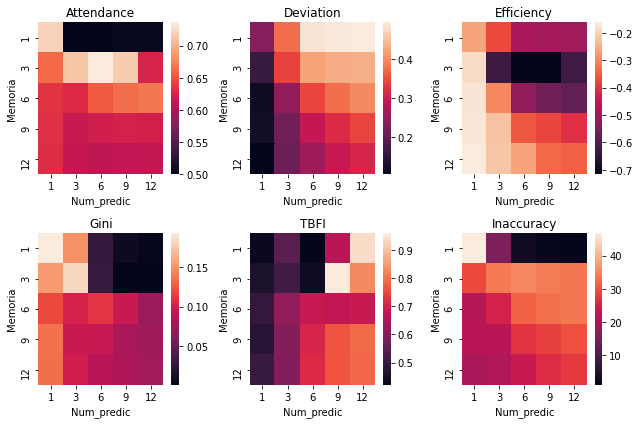

In [3]:
variables = ['Attendance','Deviation','Efficiency','Gini','TBFI','Inaccuracy']
G.graficar_heatmaps(data, parametros=['Memoria','Num_predic'], 
                    variables=variables,to_file=True)